### Data Loading and splitting

In [1]:
from sklearn.model_selection import train_test_split as split
import pandas as pd
from src.data_util import load_data
from src.LogisticRegression import LRClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
headlines = load_data("../data/dataset.conllu")

# split into training and test sets
SEED = 42
train_headlines, other_headlines = split(headlines, test_size=0.3, random_state=SEED)
val_headlines, test_headlines = split(other_headlines, test_size=0.5, random_state=SEED)
print(f"Number of headlines for training, validation, and test is {len(train_headlines)}, {len(val_headlines)}, and {len(test_headlines)} resp.")

Number of headlines for training, validation, and test is 20033, 4293, and 4293 resp.


### Model Training and Selection

In [3]:
# fit logistic regression with bag of words vectorizer
logreg_BOW = LRClassifier(use_tfidf=False, remove_stopwords=False)
logreg_BOW.fit(train_headlines)


C:\Users\MSC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 20033/20033 [02:34<00:00, 129.41it/s]


LRClassifier()

100%|██████████| 4293/4293 [00:02<00:00, 1874.38it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2218
           1       0.79      0.80      0.80      2075

    accuracy                           0.80      4293
   macro avg       0.80      0.80      0.80      4293
weighted avg       0.80      0.80      0.80      4293



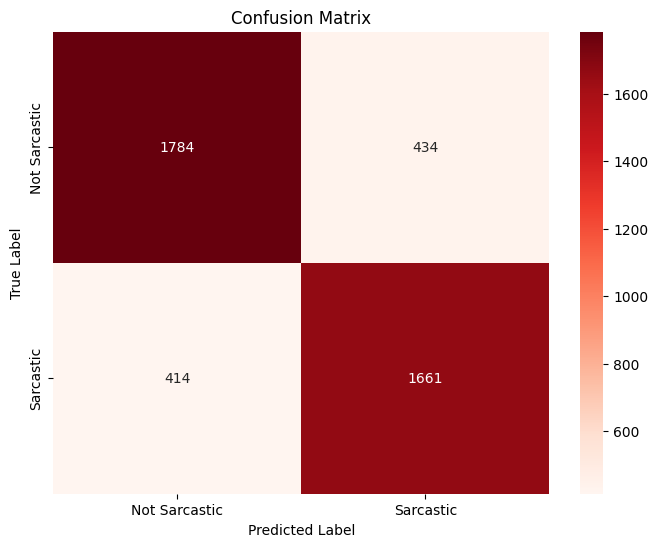

False positives and false negatives stored in self.false_positives_df and self.false_negatives_df.


In [4]:

# Evaluate the model
logreg_BOW.evaluate(val_headlines,show_confusion_matrix=True)

C:\Users\MSC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 4293/4293 [00:04<00:00, 942.92it/s] 


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      2218
           1       0.80      0.84      0.82      2075

    accuracy                           0.82      4293
   macro avg       0.82      0.82      0.82      4293
weighted avg       0.82      0.82      0.82      4293



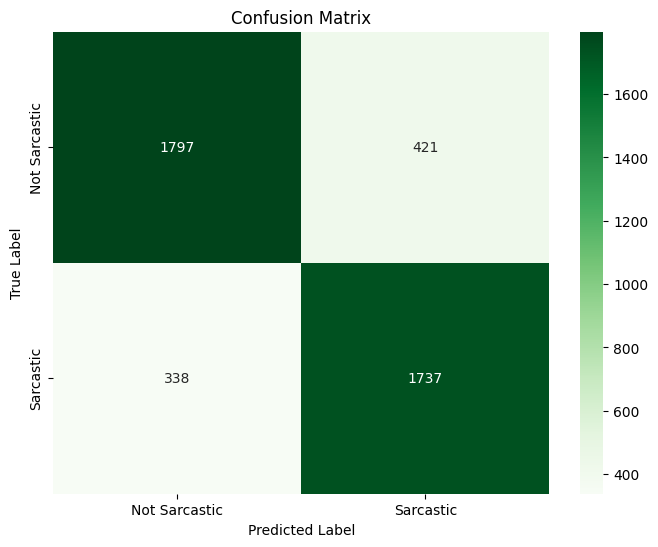

False positives and false negatives stored in self.false_positives_df and self.false_negatives_df.


In [5]:
# fit logistic regression with TD-IDF vectorizer
logreg_tfidf = LRClassifier(use_tfidf=True, remove_stopwords=False)
logreg_tfidf.fit(train_headlines)

# Evaluate the model
logreg_tfidf.evaluate(val_headlines,show_confusion_matrix=True)

### Model Performance Summary

#### 1. **Bag of Words**
- **Accuracy**: 0.80
- **Recall for Sarcastic (Class 1)**: 0.80
- **Strength**: Balanced performance, good for both classes.

#### 2. **TF-IDF**
- **Accuracy**: 0.82
- **Recall for Sarcastic (Class 1)**: 0.82
- **Strength**: Best recall for sarcastic headlines, better at identifying sarcasm.


---

### **Recommendation**
The **TF-IDF** model is recommended for further analysis due to its highest recall for sarcastic headlines (0.84), making it the most effective at detecting sarcasm while maintaining balanced performance across both classes.


In [6]:
model = logreg_tfidf

## Error Analysis

### Close Calls

In the next cell we want to investigate, what kind of headlines the model is not sure about. The probability of 'Sarcasm' is around $0.5$ 

In [7]:
# panda display option so headlines dont get truncated
pd.set_option('display.max_colwidth', None)

false_positives_df = model.false_positives_df
false_negatives_df = model.false_negatives_df

# Modify the 'Probability' column to only contain the second value of the list
false_positives_df['Probability'] = false_positives_df['Probability'].apply(lambda x: x[1])
false_negatives_df['Probability'] = false_negatives_df['Probability'].apply(lambda x: x[1])


In [8]:


# sort so the uncertain cases are on top
sorted_false_positives = false_positives_df.sort_values(by="Probability", ascending=True)
sorted_false_negatives = false_negatives_df.sort_values(by="Probability", ascending=False)

print(sorted_false_positives.head(5))
print(sorted_false_negatives.head(5))

     Index  \
402   4114   
324   3335   
172   1782   
23     329   
180   1856   

                                                                       Headline  \
402                        retire research chimp be really enjoy their new home   
324                                      lady why can not we all just get along   
172        radical islamist preacher anjem choudary find guilty of support isis   
23   this awesome dad craft intricate toast breakfast for daughter with allergy   
180                                   advice on college application essay write   

     True Class  Predicted Class  Probability  
402           0                1     0.500631  
324           0                1     0.500652  
172           0                1     0.501011  
23            0                1     0.501514  
180           0                1     0.501856  
     Index  \
264   3348   
145   1786   
99    1289   
1       13   
216   2752   

                                           

The false positives do not exhibit any specific features that might explain why the model detects sarcasm. Even very straightforward sentences, such as *"Robin Hood Foundation,"* are labeled as sarcastic. Similarly, the false negatives are not particularly egregious. Many of the "close" false negatives would be difficult for even a human with real-world knowledge to classify correctly. 

Overall, we conclude that the "close calls" made by the Logistic Regression model are reasonable. Many of the misclassified sarcastic headlines could just as easily be interpreted as non-sarcastic.


### Egregious Mistakes

Now we will take a look at biggest errors of the model and maybe find a trend.

In [9]:
# sort so the high confidence cases are on top
sorted_false_positives = false_positives_df.sort_values(by="Probability", ascending=False)
sorted_false_negatives = false_negatives_df.sort_values(by="Probability", ascending=True)

print(sorted_false_positives.head(5))
print(sorted_false_negatives.head(5))

     Index                                                     Headline  \
341   3525                                        pizza rat have return   
190   1992               pope visit one of italy 's most dangerous area   
327   3378            18 alternative to those play out dorm room poster   
95    1099         woman meet george w. bush while report for jury duty   
11     148  andie macdowell audience ' fear of get old hinder old actor   

     True Class  Predicted Class  Probability  
341           0                1     0.935584  
190           0                1     0.912140  
327           0                1     0.882580  
95            0                1     0.854374  
11            0                1     0.850887  
     Index  \
328   4116   
194   2456   
65     846   
159   1994   
11     123   

                                                                                                                       Headline  \
328                                          

Upon reviewing the errors, a clear trend is not immediately apparent. However, it seems that many of the false positive headlines exhibit hyperbolic language or discuss outrageous topics. These characteristics could lead the model to incorrectly classify them as sarcastic. 

### Key Characteristics of False Positive Headlines:
- **Hyperbolic Style**: The false positive headlines often use exaggerated or overstated language. This hyperbole may cause the model to misinterpret the headlines as sarcastic, even though they are not intended to be. For example *"fired lesbian catholic school teacher locked out of archdiocese while trying to deliver petitions"*
  
- **Outrageous Claims**: Headlines that make outlandish or extreme claims tend to confuse the model. The outrageous nature of these claims—whether they involve absurd scenarios, inventions, or predictions—can make them appear sarcastic. *"epa accidentally spills millions of gallons of waste, turning river orange"*

### Conclusion

While we cannot immediately identify a single trend, the false positive headlines tend to exhibit hyperbolic language or discuss extreme topics, which may lead the model to classify them as sarcastic. To improve the model's accuracy, further refinements could focus on better distinguishing between sarcasm and hyperbole.


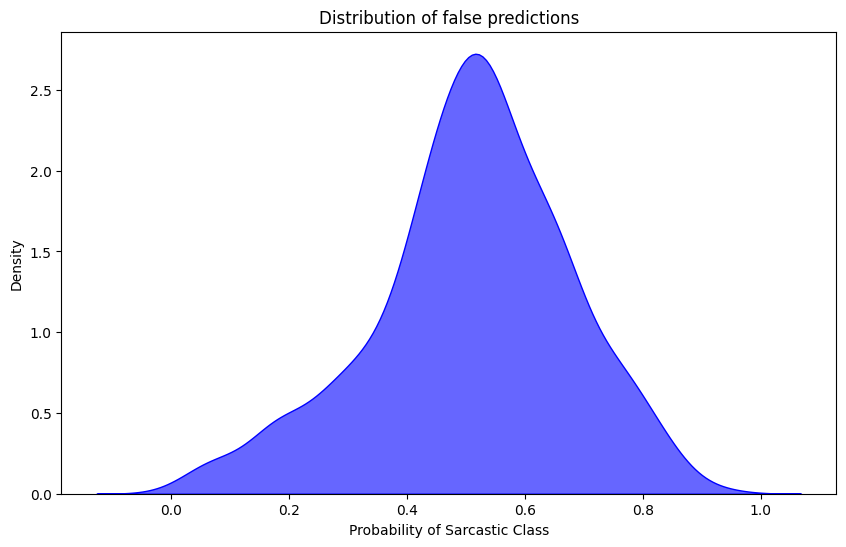

In [10]:
# combine the two DataFrames
combined_df = pd.concat([false_positives_df, false_negatives_df])

# density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='Probability', fill=True, color='blue', alpha=0.6)
plt.title('Distribution of false predictions')
plt.xlabel('Probability of Sarcastic Class')
plt.ylabel('Density')
plt.show()

### Analysis of the Density Plot for False Predictions

#### Plot Description
The density plot shows the predicted probabilities of the logistic regression model for misclassified headlines:  
The x-axis shows the probability of sarcasm, and the y-axis shows the density of errors.

---

#### Key Observations
1. **Uncertainty Leads to Errors**:  
   - Most errors occur between **0.4 and 0.6**, where the model is least confident.  

2. **Fewer Errors with High Confidence**:  
   - Errors decrease when the model assigns probabilities closer to 0 (non-sarcastic) or 1 (sarcastic).  

---

#### Interpretation
The model struggles most near the decision boundary (**0.5**), where predictions are ambiguous. Improving performance in this range could involve:  
- Better feature engineering.  
- Using more complex models like ensembles or deep learning.  



,Word,Coefficient,Sentiment
0,area,5.046533,Sarcastic
1,nation,4.958257,Sarcastic
2,report,3.777273,Sarcastic
3,of,3.663849,Sarcastic
4,man,3.525343,Sarcastic
5,he,3.332578,Sarcastic
6,local,2.932019,Sarcastic
7,fuck,2.810686,Sarcastic
8,announce,2.604276,Sarcastic
9,only,2.512148,Sarcastic


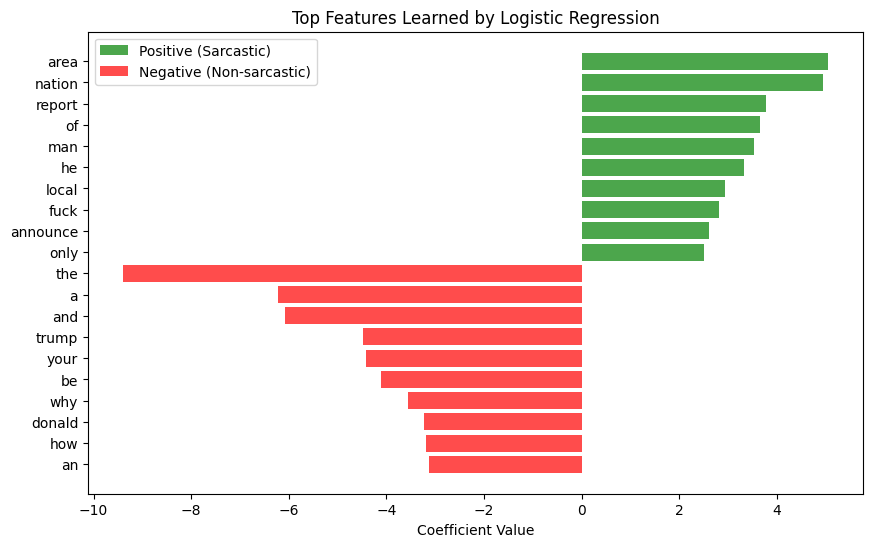

In [11]:
model.interpret_model(n_top_features=10)

### Analysis of Top Features Learned by Logistic Regression

#### Plot Description
The plot displays the **most influential words** identified by the Logistic Regression model:  
- **Positive Coefficients (Green):** Words that indicate sarcasm.  
- **Negative Coefficients (Red):** Words that indicate non-sarcastic headlines. 


The x-axis represents the coefficient values, which determine the importance and direction of influence of each word.

---

#### Key Observations
1. **Stopwords Have High Influence:**  
   Words like **"the," "is," "and," "of"** and other common stopwords are among the most influential features, particularly on the non-sarcastic side.  

2. **Content Words for Sarcasm:**  
   Words like **"nation," "area," "man," "report,"** and **"announces"** have high positive coefficients, indicating they are strong indicators of sarcasm.

3. **Donald Trump:**
    Like we have seen in other experiments the words **Donald** and **Trump** are high indicators for non-sarcasm which is a bias in the data we are aware of.
    

---

#### Impact of Keeping Stopwords
- **Why Stopwords Were Kept**:  
  In headline text, stopwords often contribute to tone, style, or structure, which can distinguish sarcastic from non-sarcastic headlines.  
  For example, "the" or "is" can appear in repetitive, formulaic patterns common in sarcastic content.

- **Is Keeping Stopwords a Good Idea?**  
  Yes, in this context:  
  - Headline language relies on short, structured phrases where stopwords **provide syntactic context**.  
  - Removing stopwords could reduce the model's ability to capture subtle patterns or tone differences.  
  - For simple baseline models this may not be impactful but we want to use more complex models in the fututre that can pick up these pattern.

---

#### Conclusion
The model effectively uses **both content words and stopwords** to distinguish between sarcastic and non-sarcastic headlines. Keeping stopwords could be beneficial here as they hold contextual importance in headline data. Future improvements could involve exploring **n-grams** to better capture multi-word patterns.
